Best path: [1, 0, 2, 4, 5, 6, 3, 1]
Best cost: 34


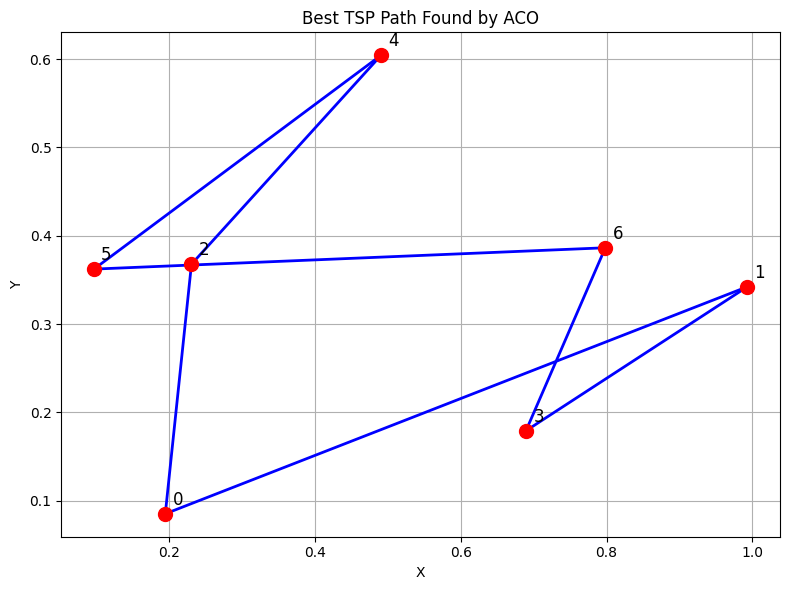

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Distance matrix between cities (symmetric)
cities = np.array([
    [0, 2, 9, 10, 7, 14, 11],
    [1, 0, 6, 4, 12, 8, 10],
    [15, 7, 0, 8, 6, 9, 13],
    [6, 3, 12, 0, 9, 11, 5],
    [7, 12, 6, 9, 0, 4, 8],
    [14, 8, 9, 11, 4, 0, 6],
    [11, 10, 13, 5, 8, 6, 0]
])

# Parameters
num_ants = 10
num_iterations = 100
decay = 0.1
alpha = 1
beta = 2

num_cities = cities.shape[0]
pheromone = np.ones((num_cities, num_cities)) / num_cities

best_cost = float('inf')
best_path = None

# Generate random coordinates for cities (for plotting)
city_coords = np.random.rand(num_cities, 2)

# Route distance function
def route_distance(route):
    dist = 0
    for i in range(len(route)):
        dist += cities[route[i - 1], route[i]]
    return dist

# Select next city based on probability
def select_next_city(probabilities):
    return np.random.choice(range(len(probabilities)), p=probabilities)

# Main ACO loop
for iteration in range(num_iterations):
    all_routes = []
    all_distances = []

    for ant in range(num_ants):
        visited = []
        current_city = np.random.randint(num_cities)
        visited.append(current_city)

        while len(visited) < num_cities:
            unvisited = list(set(range(num_cities)) - set(visited))
            pheromone_values = np.array([pheromone[current_city][j] for j in unvisited])
            distances = np.array([cities[current_city][j] for j in unvisited])
            heuristic = 1 / distances
            prob = (pheromone_values ** alpha) * (heuristic ** beta)
            prob /= prob.sum()
            next_city = unvisited[select_next_city(prob)]
            visited.append(next_city)
            current_city = next_city

        route = visited
        distance = route_distance(route)
        all_routes.append(route)
        all_distances.append(distance)

        if distance < best_cost:
            best_cost = distance
            best_path = route

    # Pheromone evaporation
    pheromone *= (1 - decay)

    # Pheromone update
    for route, dist in zip(all_routes, all_distances):
        for i in range(num_cities):
            a, b = route[i - 1], route[i]
            pheromone[a][b] += 1 / dist

# Add return to starting city
best_path_complete = best_path + [best_path[0]]

# Print best solution
print("Best path:", best_path_complete)
print("Best cost:", best_cost)

# -------- Visualization --------
plt.figure(figsize=(8, 6))
x = city_coords[:, 0]
y = city_coords[:, 1]

# Plot cities
plt.scatter(x, y, c='red', s=100, zorder=5)
for i, (xi, yi) in enumerate(city_coords):
    plt.text(xi + 0.01, yi + 0.01, f'{i}', fontsize=12)

# Plot best path
for i in range(len(best_path_complete) - 1):
    a, b = best_path_complete[i], best_path_complete[i + 1]
    plt.plot([x[a], x[b]], [y[a], y[b]], 'b-', linewidth=2)

plt.title("Best TSP Path Found by ACO")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.tight_layout()
plt.show()
